In [3]:
print(__doc__)
import numpy as np
import scipy as sp
import pandas as pd
from subprocess import check_output
 
import time, json
from datetime import date
 
import time
import math
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import numpy as np
import pandas as pd
import sklearn.preprocessing as prep
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

Automatically created module for IPython interactive environment


In [26]:
df= pd.read_csv('grd.csv')
df4=df.set_index("Code")

In [27]:

df4=df.set_index("Code")

In [28]:
uniqueVals = df["Code"].unique()

In [29]:
grouped_df=pd.DataFrame()
for i in uniqueVals:
    df5 = (df4.loc[i,:]).groupby(['Code','Date']).mean()
    # store DataFrame in list
    grouped_df=grouped_df.append(df5)
grouped_df.reset_index()
del df5

In [30]:
grouped_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [31]:
grouped_df.head()

Open      High       Low     Close        Volume
Code       Date                                                            
3IINFOTECH 2014-12-18  7.437910  7.446311  7.427869  7.435041   2538.135246
           2014-12-19  7.582241  7.597414  7.571207  7.583621   2778.203448
           2014-12-22  7.782296  7.793385  7.769650  7.781907   6414.482490
           2014-12-23  7.771465  7.778030  7.762879  7.769444   1944.929293
           2014-12-24  8.321127  8.347465  8.294648  8.321972  10216.726761

In [32]:
def create_dataset(dataset,past=5):
    dataX, dataY = [], []
    for i in range(len(dataset)-past-1):
        j = dataset[i:(i+past), 0]
        dataX.append(j)
        dataY.append(dataset[i + past, 0])
    return np.array(dataX), np.array(dataY)

In [33]:
from sklearn.preprocessing import MinMaxScaler
def testandtrain(prices):
    prices = prices.reshape(len(prices), 1)
    prices.shape
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = scaler.fit_transform(prices)
    trainsize = int(len(prices) * 0.80)
    testsize = len(prices) - trainsize
    train, test = prices[0:trainsize,:], prices[trainsize:len(prices),:]
    print(len(train), len(test))
    x_train,y_train = create_dataset(train,1)
    x_test,y_test = create_dataset(test,1)
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
    
    return x_train,y_train, x_test,y_test

In [34]:
def trainingmodel(model, trainX, trainY):
    model = Sequential()
    model.add(LSTM(20, input_shape=(1,1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
    return model

ARVINDREM
143 36
Epoch 1/10
141/141 - 1s - loss: 0.1117
Epoch 2/10
141/141 - 0s - loss: 0.0464
Epoch 3/10
141/141 - 0s - loss: 0.0339
Epoch 4/10
141/141 - 0s - loss: 0.0261
Epoch 5/10
141/141 - 0s - loss: 0.0182
Epoch 6/10
141/141 - 0s - loss: 0.0109
Epoch 7/10
141/141 - 0s - loss: 0.0060
Epoch 8/10
141/141 - 0s - loss: 0.0036
Epoch 9/10
141/141 - 0s - loss: 0.0030
Epoch 10/10
141/141 - 0s - loss: 0.0030
Test RMSE: 0.025


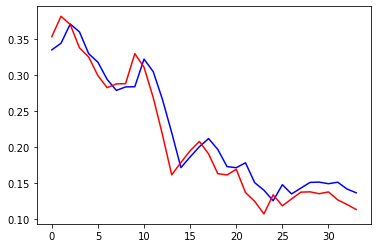

 --------end for the company------
ASHOKA
146 37
Epoch 1/10
144/144 - 1s - loss: 0.1332
Epoch 2/10
144/144 - 0s - loss: 0.0222
Epoch 3/10
144/144 - 0s - loss: 0.0142
Epoch 4/10
144/144 - 0s - loss: 0.0091
Epoch 5/10
144/144 - 0s - loss: 0.0061
Epoch 6/10
144/144 - 0s - loss: 0.0050
Epoch 7/10
144/144 - 0s - loss: 0.0047
Epoch 8/10
144/144 - 0s - loss: 0.0047
Epoch 9/10
144/144 - 0s - loss: 0.0044
Epoch 10/10
144/144 - 0s - loss: 0.0044
Test RMSE: 0.065


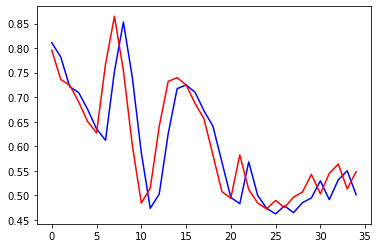

 --------end for the company------


In [36]:
for val in uniqueVals[30:32]:
    df1=grouped_df.loc[val,:]
    df2=df1.reset_index()
    prices = df2['Close'].values.astype('float32')
    print(val)
    #train model
    model = Sequential()   
    trainX, trainY, testX, testY=testandtrain(prices)
    model = trainingmodel(model, trainX, trainY)
    
    #predict and plot
    predictingY=predicting(prices,testX,testY,trainX)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

def predicting(prices, testX,testY,trainX):
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = prices.reshape(len(prices), 1)
    prices.shape
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = scaler.fit_transform(prices)
    
    testPredict = model.predict(testX)

    error = math.sqrt(mean_squared_error(testY, testPredict))
    print('Test RMSE: %.3f' % error)
    
    
    plt.plot(testPredict,color="blue")
    plt.plot(testY,color='red')
    
    plt.show()
    print(" --------end for the company------")
    return testPredict

In [38]:
from tensorflow.keras.models import load_model
model.save('predict_price.h5')

In [39]:
mode = load_model('predict_price.h5')